In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('https://stepik.org/media/attachments/lesson/8086/states.csv')
data.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


In [2]:
# создаем вектор зависимой переменной и матрицу независимых
y = data['poverty']
X = data[['metro_res', 'white', 'hs_grad', 'female_house']]

# добавляем столбцец констант (единичного) в начало матрицы переменных (для intercept)
X = sm.add_constant(X)

In [3]:
# создаем модель линейной регрессии с помошью OLS (Ordinary Least Squares)
model = sm.OLS(y, X)

# обучаем модель
results = model.fit()

#выводим
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     20.58
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           8.88e-10
Time:                        16:44:26   Log-Likelihood:                -103.39
No. Observations:                  51   AIC:                             216.8
Df Residuals:                      46   BIC:                             226.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           66.4765     12.590      5.280      0.000      41.134      91.819
metro_res       -0.0563      0.020     -2.881      0.006      -0.096      -0.017
white           -0.0481      0.033     -1.456      0.152      -0.115       0.018
hs_grad         -0.5547      0.105     -5.288      0.000      -0.766      -0.344
female_house     0.0505      0.243      0.208      0.836      -0.439       0.540
==============================================================================
Omnibus:                        3.254   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                3.043
Skew:                           0.585   Prob(JB):                        0.218
Kurtosis:                       2.750   Cond. No.                     6.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
# т.к. число обусловленности матрицы довольно большое, то появляются подозрения на мультиколлиниарность (корреляция независимых переменных)
# проверим переменные на мультиколлиниарность с помощью матрицы корреляции
correlation_matrix = X.corr()
correlation_matrix

,const,metro_res,white,hs_grad,female_house
const,NaN,NaN,NaN,NaN,NaN
metro_res,NaN,1.000000,-0.342442,0.018110,0.300062
white,NaN,-0.342442,1.000000,0.238156,-0.751394
hs_grad,NaN,0.018110,0.238156,1.000000,-0.611867
female_house,NaN,0.300062,-0.751394,-0.611867,1.000000


In [5]:
# судя по матрице корреляции, переменная female_house сильно коррелирует с предикторами white и hs_grad, что является основанием для мультиколлиниарности
# но это не очень строгое доказательство (хотя матрица дает неплохое предствление о корреляции переменных
# для более формальной проверки на мультиколлиниарность воспользуемся Variance Inflation Factor (VIF)
# общепринятный порог для определения проблем с мультиколлинеарностью - VIF более 10
# однако в некоторых источниках можно встретить более консервативный порог в 5
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Variable,VIF
0,const,2160.281120
1,metro_res,1.191723
2,white,2.821178
3,hs_grad,2.041526
4,female_house,4.390962


In [6]:
# VIF для female_houses получился 4.39, что не проходит даже консервативный порог, но все таки стоит проверить, как поведет себя модель без этой переменной
# исключаем переменную
X_excluded = X.drop(columns = ['female_house'])

# строим новую модель
model_excluded = sm.OLS(y, X_excluded)
results_excluded = model_excluded.fit()
results_excluded.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     28.00
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           1.55e-10
Time:                        16:44:26   Log-Likelihood:                -103.41
No. Observations:                  51   AIC:                             214.8
Df Residuals:                      47   BIC:                             222.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.7220      6.389     10.756      0.000      55.869      81.575
metro_res     -0.0555      0.019     -2.926      0.005      -0.094      -0.017
white         -0.0533      0.021     -2.483      0.017      -0.097      -0.010
hs_grad       -0.5697      0.075     -7.569      0.000      -0.721      -0.418
==============================================================================
Omnibus:                        3.479   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                3.230
Skew:                           0.607   Prob(JB):                        0.199
Kurtosis:                       2.787   Cond. No.                     3.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residuals')

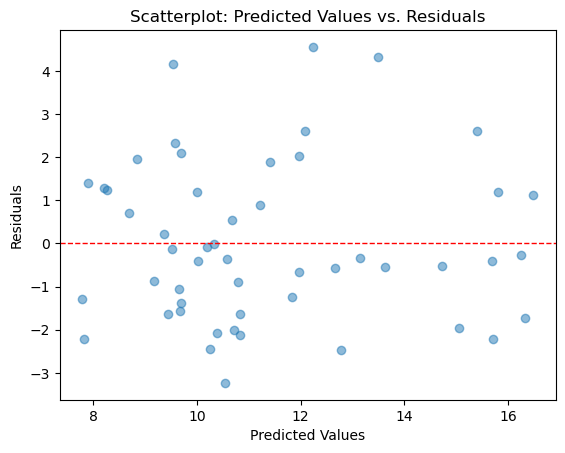

In [7]:
# исключив предиктор female_house, мы увеличили значение Adj. R-squared на 0.08 (0.610 -> 0.618), что явялется неплохим результатом
# также можно заметить, что p-value предиктора white изменилось с 0.152 на 0.017 (что уже < 0.05), т.е. мы можем отклонить нулевую гипотезу о том, что этот параметр не дает статистически важные различия
# другие показатели тоже улучшились (F-статистика, AIC, BIC  и т.д.)
# в выводе написано, что число обусловленности все равно большое, но исключение любой из переменных заметно ухудшит модель

# для того, чтобы мы могли говорить об обоснованности модели, надо изучить свойсвта остатков
# а именно, нужно как минимум, чтобы они обладали свойством гомоскедастичности и чтобы они расспределялись нормальным образом
# построим графики, чтобы проверить эти свойства
# начнем с графика отклонений остатков от предсказанных значений
predicted_values = results_excluded.fittedvalues
residuals = results_excluded.resid

plt.scatter(predicted_values, residuals, alpha = 0.5)
plt.axhline(y = 0, color = 'r', linestyle = '--', linewidth = 1) # линия для нулевых остатков
plt.title('Scatterplot: Predicted Values vs. Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

Text(0.5, 1.0, 'QQ-Plot for Residuals')

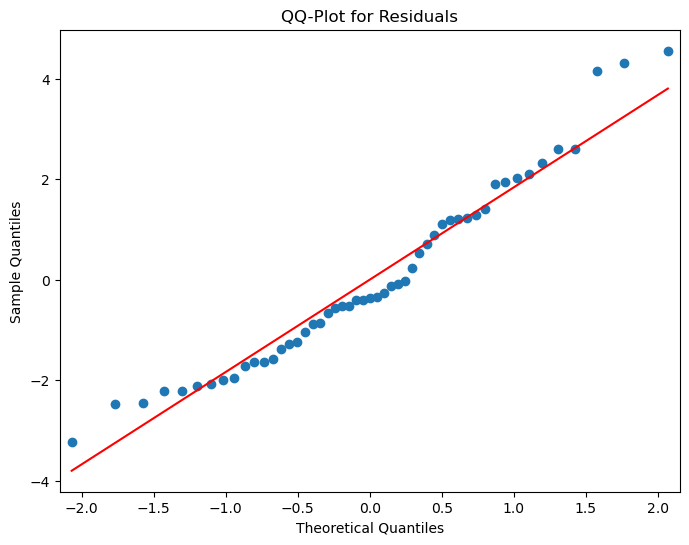

In [8]:
# как видим, гомоскедастичность остатков выполняется (более-менее)
# теперь построим qq-plot для того, чтобы проверить нормлаьность распределения остатков
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(residuals, line = 's', ax = ax)
plt.title('QQ-Plot for Residuals')